In [1]:
import pandas as pd
import numpy as np
import scipy
import pysr
import sympy
import math
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia ^1.10.3
[juliapkg] Using Julia 1.11.6 at /home/ajt6830/.julia/juliaup/julia-1.11.6+0.x64.linux.gnu/bin/julia
[juliapkg] Using Julia project at /home/ajt6830/.local/share/mamba/envs/pysr_env/julia_env
[juliapkg] Writing Project.toml:
             [deps]
             SymbolicRegression = "8254be44-1295-4e6a-a16d-46603ac705cb"
             Serialization = "9e88b42a-f829-5b0c-bbe9-9e923198166b"
             PythonCall = "6099a3de-0909-46bc-b1f4-468b9a2dfc0d"
             OpenSSL_jll = "458c3c95-2e84-50aa-8efc-19380b2a3a95"
             [compat]
             SymbolicRegression = "~1.11

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed JLLWrappers ─ v1.7.1
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.26
⌅ [8254be44] + SymbolicRegression v1.11.3
  [458c3c95] + OpenSSL_jll v3.5.1+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.3
  [8d63f2c5] + DispatchDoctor v0.4.2

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
pip install sxs

  Using cached sxs-2025.0.18-py3-none-any.whl.metadata (13 kB)
  Using cached bibtexparser-2.0.0b8-py3-none-any.whl.metadata (5.4 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached quaternionic-1.0.15-py3-none-any.whl.metadata (18 kB)
  Using cached spherical-1.0.16-py3-none-any.whl.metadata (7.7 kB)
  Using cached sxscatalog-3.0.17-py3-none-any.whl.metadata (1.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached spinsfast-2022.4.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (520 bytes)
Using cached sxs-2025.0.18-py3-none-any.whl (224 kB)
Using cached bibtexparser-2.0.0b8-py3-none-any.whl (39 kB)
Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
Using cached quaternionic-1.0.15-py3-none-any.whl (37 kB)
Using cached spherical-1.0.16-py3-none-any.whl (55 kB)
Using cached spinsfast-2022.4.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x

In [3]:
import sxs
print(sxs.__file__)
print(sxs.__version__)
print(dir(sxs))

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/sxs/__init__.py
2025.0.18
['Catalog', 'HorizonQuantities', 'Horizons', 'Metadata', 'Simulation', 'Simulations', 'TimeSeries', 'WaveformModes', 'WaveformModesDict', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'astronomical_unit', 'catalog', 'citation', 'cite', 'doi_prefix', 'doi_url', 'file_format', 'guvectorize', 'handlers', 'horizons', 'importlib_metadata', 'jit', 'lev_number', 'load', 'load_lvc', 'load_via_sxs_id', 'loadcontext', 'local_simulations', 'm_sun_in_meters', 'm_sun_in_seconds', 'metadata', 'parsec_in_meters', 'read_config', 'rpdmb', 'rpxmb', 'simulations', 'solar_mass_parameter', 'spectre_cce_v1', 'speed_of_light', 'sxs_directory', 'sxs_id', 'sxs_id_to_url', 'time_series', 'to_lvc_conventions', 'utilities', 'vectorize', 'version_info', 'waveforms', 'write_config', 'write_local_simulations', 'zenodo']


In [4]:
pip install corner

  Using cached corner-2.2.3-py3-none-any.whl.metadata (2.2 kB)
Using cached corner-2.2.3-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import corner

In [6]:
def Newtonian_CHT(X):
    #tau is orbital period, q is mass_ratio, A is scaling constant based on fundamental mathematical and physical constants with G = C = 1
    A = 5/(16*np.pi)**(8/3)
    tau, q = X
    return A*tau**(8/3)*(q+1)**2/q

def nu(q):
    return q/(q+1)**2

In [11]:
def dataframe(non_eccentric, non_spinning, aligned_spin, not_deprecated):
    df = sxs.load("dataframe")
    df = df.loc[np.isfinite(df["common_horizon_time"])] #This gets rid of any simulations with neutron stars
    df = df.loc[np.isfinite(df["reference_eccentricity"])] #Apparently some bhbh simulations with NaN values for the eccentricity
    if non_eccentric:
        df = df.loc[df['reference_eccentricity'] < 0.01]
    if non_spinning:
        df = df.loc[df["reference_dimensionless_spin1_mag"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_mag"] < 0.001]
    if aligned_spin:
        df = df.loc[df["reference_dimensionless_spin1_x"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_x"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin1_y"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_y"] < 0.001]
    if not_deprecated:
        df = df.loc[df["deprecated"] == False]
    #df = df.drop('SXS:BBH:0621') #All of my best models were having a hard time fitting CHT for this simulation. Seems like an outlier
    return df    
    
df = dataframe(non_eccentric = True, non_spinning = True, aligned_spin = True, not_deprecated = True)
print(len(df))

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.
81


In [13]:
ref_orb_period = 2*np.pi/df["reference_orbital_frequency_mag"]
CHT = df["common_horizon_time"] - df["reference_time"]

In [15]:
#This first block subtracts corrections due to varying mass ratio from the quadrupolar, Newtonian model
init_param_q = np.column_stack((ref_orb_period, df["reference_mass_ratio"]))
with open("best_model_0.446.pk", 'rb') as file:
    loaded_model_q = pickle.load(file)

corrections = loaded_model_q.predict(init_param_q)
corrected_CHT = Newtonian_CHT([ref_orb_period, df["reference_mass_ratio"]]) - corrections #Subtracts "post-Newtonian" corrections from the Newtonian predictions for CHT

per_CHT_residual = 100*(corrected_CHT - CHT)/CHT #Defines whatever residual is left over after post-Newtonian corrections are applied to the Newtonian model
print(f"Median percentage residual in common horizon time prediction is {np.round(np.median(abs(per_CHT_residual)), 3)}%")
print(f"Max percentage residual in common horizon time prediction is {np.round(np.max(abs(per_CHT_residual)), 3)}%")

Median percentage residual in common horizon time prediction is 0.223%
Max percentage residual in common horizon time prediction is 4.7%


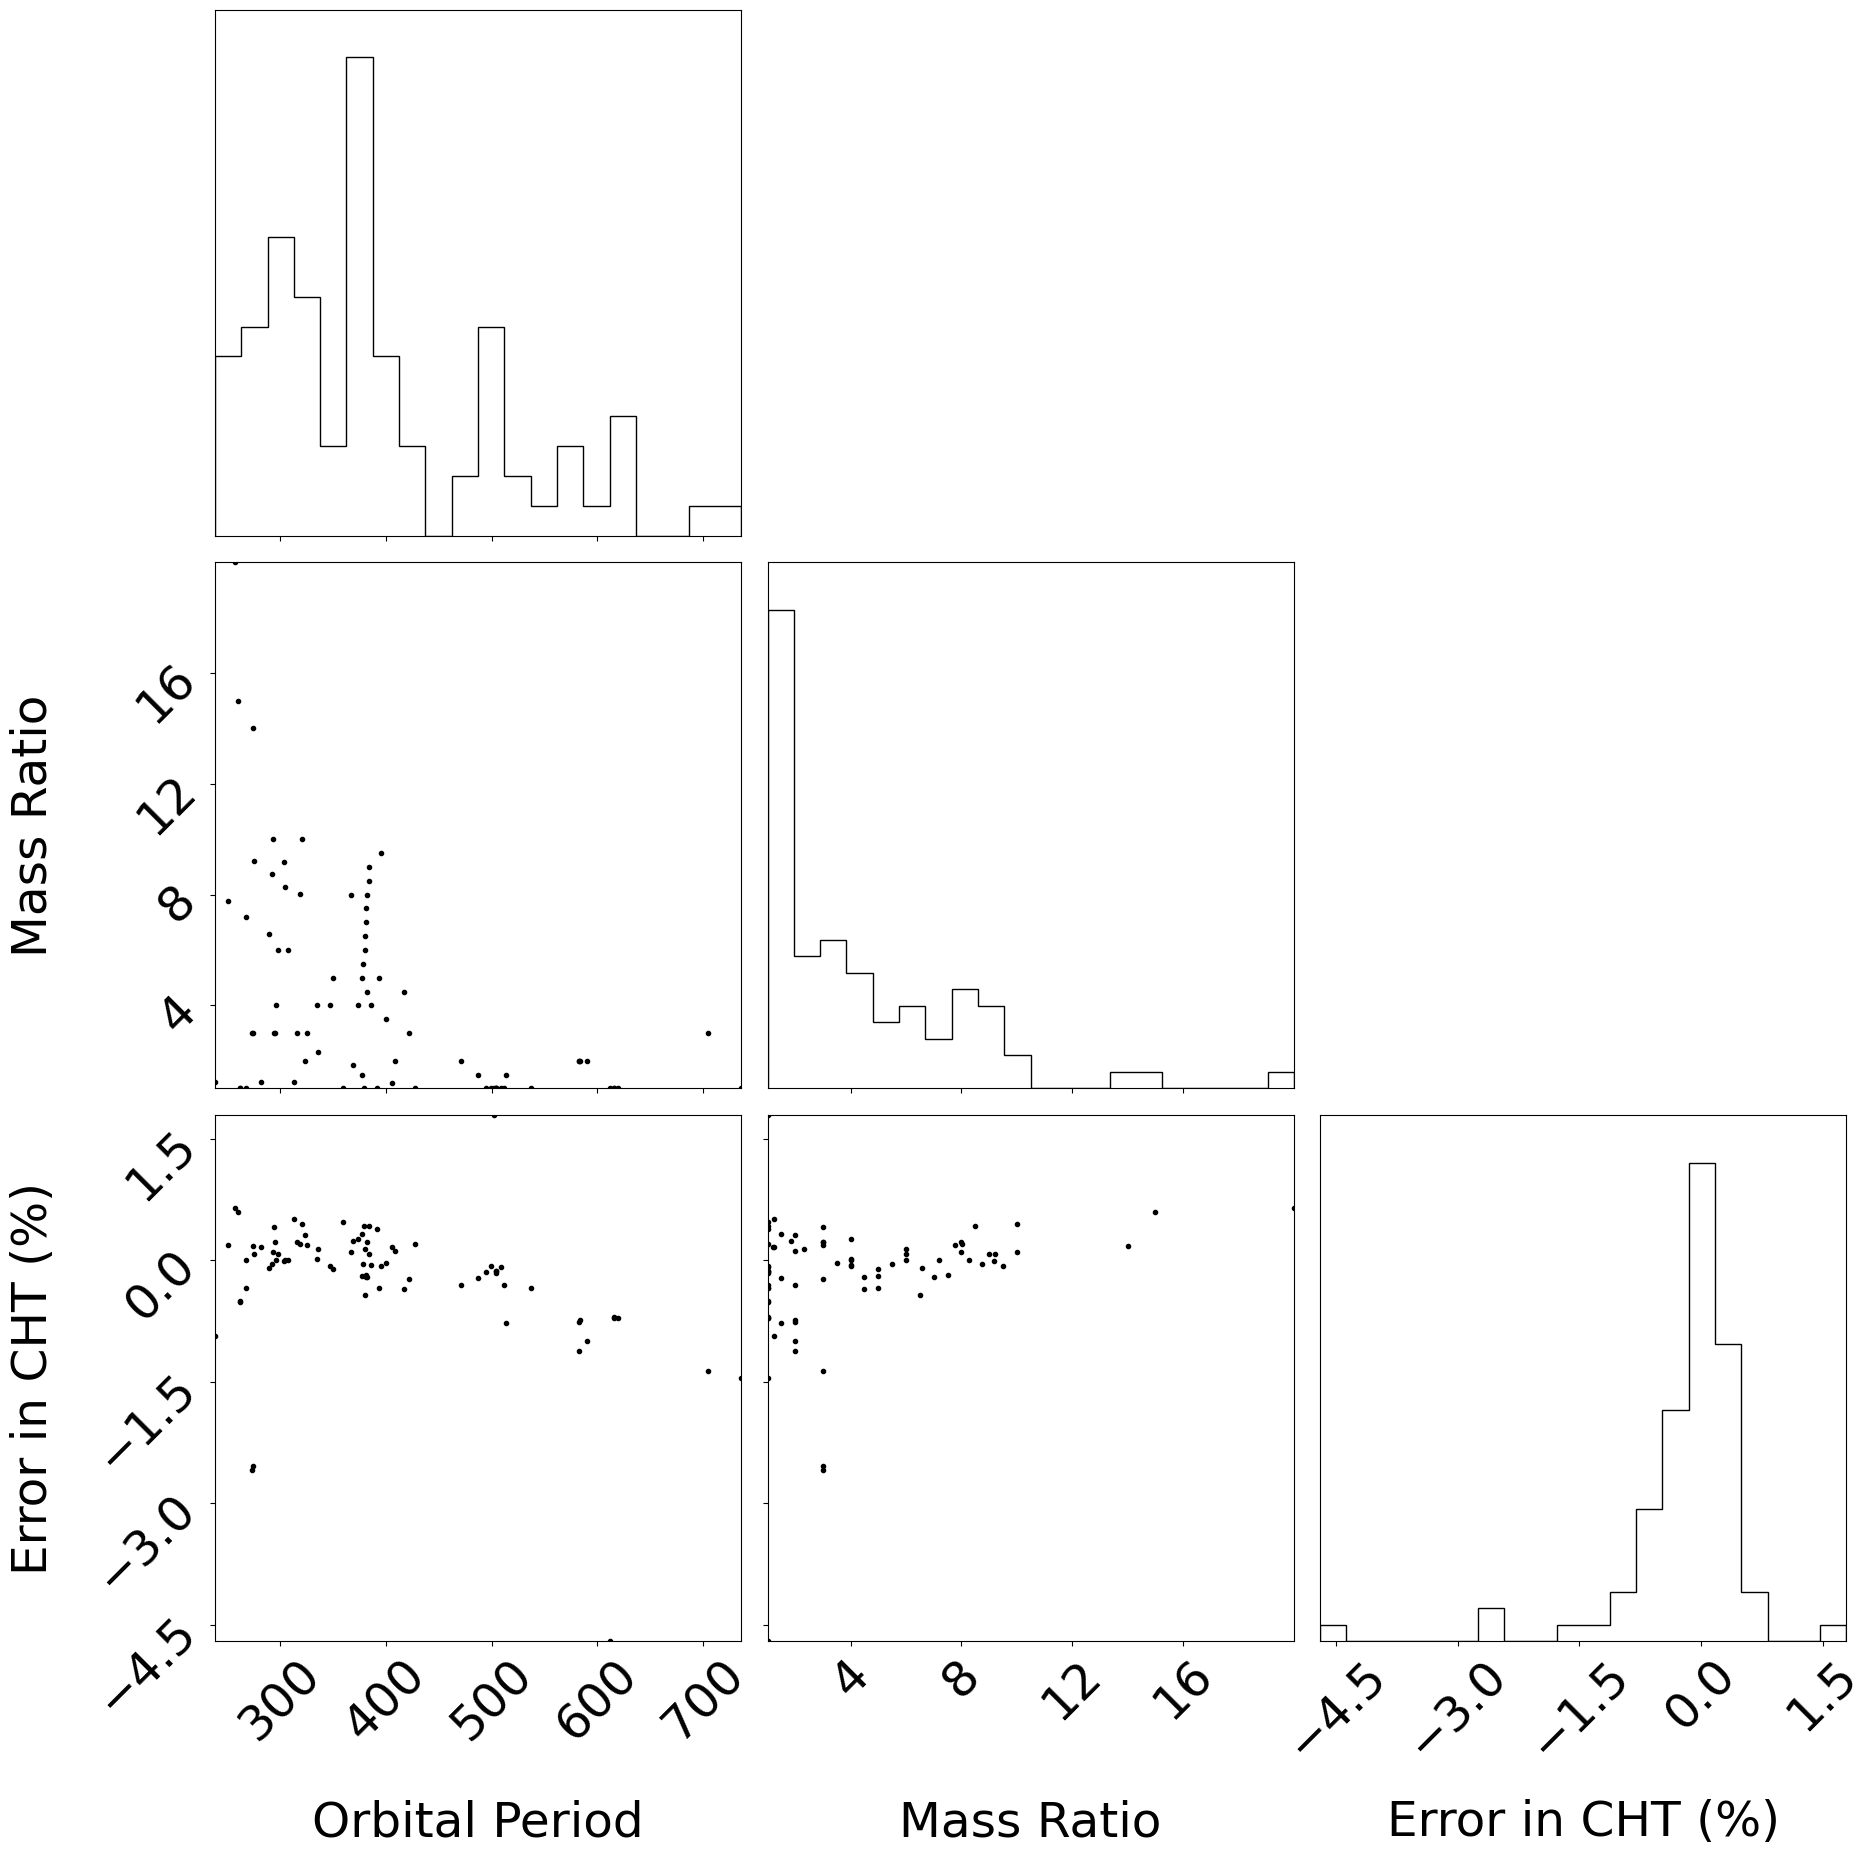

In [39]:
corner_array = np.column_stack([ref_orb_period, df["reference_mass_ratio"],  per_CHT_residual])
#Here, we've stacked the columns because we want to plot points with data from the same event, but before we just had each value for all the events stored separately

#Here is where I can set setting related to the font of the figured presented by MatPlotLib
font = {'family': 'sans-serif',
        'weight': 'normal',
        'size'   : 35}
#mpl.rcdefaults()
mpl.rc('font', **font)

corner_plot = corner.corner(
    corner_array,
    labels=[
        r"Orbital Period",
        r"Mass Ratio",
        r"Error in CHT (%)"],
    plot_contours = False, 
    plot_datapoints = True,
    plot_density = False,
    marker = ".",
    color = "black"
)
corner.overplot_points(corner_plot, corner_array, color = "black")

#Here I am retrieving the figure object and setting its size
fig = plt.gcf()
fig.set_size_inches(20, 20)

plt.savefig("non_spinning_corner_poster.png")

In [60]:
df = dataframe(non_eccentric = True, non_spinning = False, aligned_spin = True, not_deprecated = True)
print(len(df))

ref_orb_period = 2*np.pi/df["reference_orbital_frequency_mag"]
CHT = df["common_horizon_time"] - df["reference_time"]

848


In [42]:
init_param_q = np.column_stack((ref_orb_period, df["reference_mass_ratio"]))

#This second block subtracts spin corrections from the quadrupolar, Newtonian model
init_param_spin = np.column_stack((ref_orb_period, df["reference_mass_ratio"], df["reference_chi_eff"]))
with open("chi_spin_model_0.865.pk", 'rb') as file:
    loaded_model_spin = pickle.load(file)

corrections = loaded_model_q.predict(init_param_q) + loaded_model_spin.predict(init_param_spin)

corrected_CHT = Newtonian_CHT([ref_orb_period, df["reference_mass_ratio"]]) - corrections #Subtracts "post-Newtonian" corrections from the Newtonian predictions for CHT

per_CHT_residual = 100*(corrected_CHT - CHT)/CHT #Defines whatever residual is left over after post-Newtonian corrections are applied to the Newtonian model
print(f"Median percentage residual in common horizon time prediction is {np.round(np.median(abs(per_CHT_residual)), 3)}%")
print(f"Max percentage residual in common horizon time prediction is {np.round(np.max(abs(per_CHT_residual)), 3)}%")

Median percentage residual in common horizon time prediction is 0.655%
Max percentage residual in common horizon time prediction is 7.63%


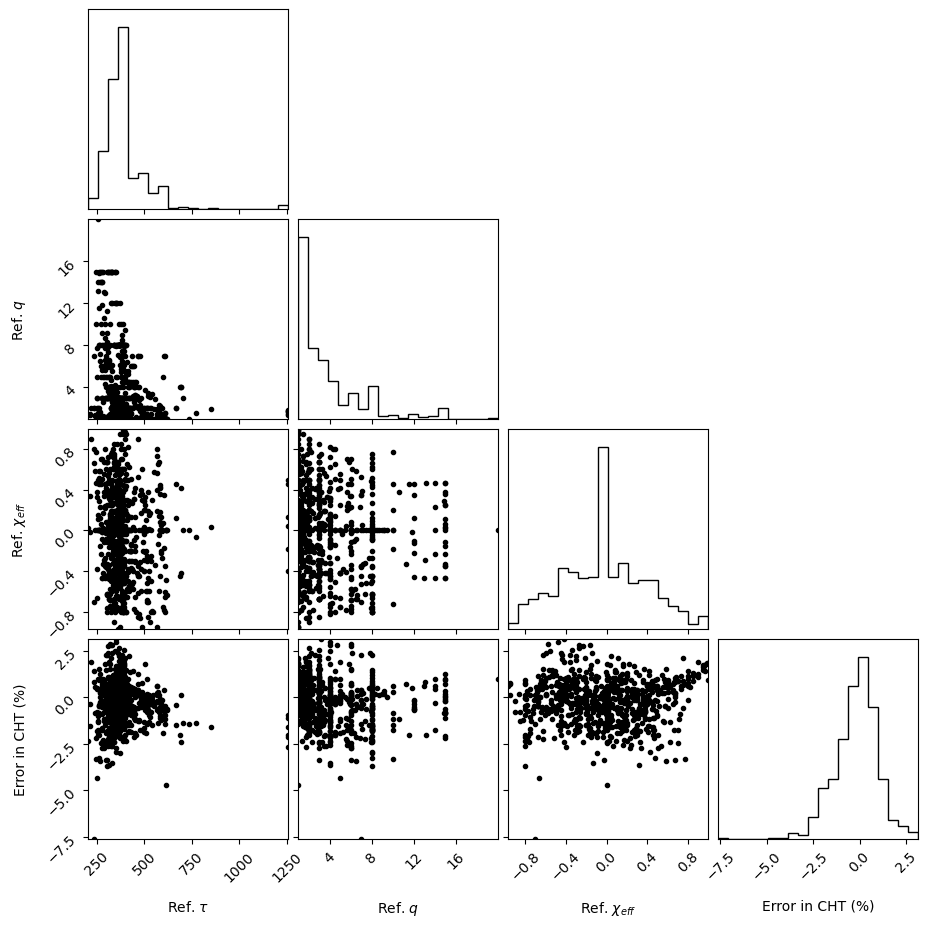

In [62]:

corner_array = np.column_stack([ref_orb_period, df["reference_mass_ratio"], df["reference_chi_eff"], per_CHT_residual])
#Here, we've stacked the columns because we want to plot points with data from the same event, but before we just had each value for all the events stored separately

corner_plot = corner.corner(
    corner_array,
    labels=[
        r"Ref. $\tau$",
        r"Ref. $q$",
        r"Ref. $\chi_{eff}$",
        r"Error in CHT (%)"],
    plot_contours = False, 
    plot_datapoints = True,
    plot_density = False,
    marker = ".",
    color = "black"
)
corner.overplot_points(corner_plot, corner_array, color = "black")

plt.savefig("aligned_spin_corner_poster.png")

In [125]:
df = dataframe(non_eccentric = True, non_spinning = False, aligned_spin = False, not_deprecated = True)
print(len(df))

ref_orb_period = 2*np.pi/df["reference_orbital_frequency_mag"]
CHT = df["common_horizon_time"] - df["reference_time"]

3527


In [52]:
init_param_q = np.column_stack((ref_orb_period, df["reference_mass_ratio"]))

#This second block subtracts spin corrections from the quadrupolar, Newtonian model
init_param_spin = np.column_stack((ref_orb_period, df["reference_mass_ratio"], df["reference_chi_eff"]))

#This third block subtracts precession corrections from the quadrupolar, Newtonian model
init_param_precess = np.column_stack((ref_orb_period, df["reference_mass_ratio"], df["reference_chi2_perp"], df["reference_chi1_perp"]))
with open("chi_spin_model_0.749.pk", 'rb') as file:
    loaded_model_precess = pickle.load(file)

corrections = loaded_model_q.predict(init_param_q) + loaded_model_spin.predict(init_param_spin) + loaded_model_precess.predict(init_param_precess)

corrected_CHT = Newtonian_CHT([ref_orb_period, df["reference_mass_ratio"]]) - corrections #Subtracts "post-Newtonian" corrections from the Newtonian predictions for CHT

per_CHT_residual = 100*(corrected_CHT - CHT)/CHT #Defines whatever residual is left over after post-Newtonian corrections are applied to the Newtonian model
print(f"Median percentage residual in common horizon time prediction is {np.round(np.median(abs(per_CHT_residual)), 3)}%")
print(f"Max percentage residual in common horizon time prediction is {np.round(np.max(abs(per_CHT_residual)), 3)}%")

Median percentage residual in common horizon time prediction is 0.611%
Max percentage residual in common horizon time prediction is 7.63%


Font 'rm' does not have a glyph for '\\perp' [U+27c2], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\perp' [U+27c2], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\perp' [U+27c2], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\perp' [U+27c2], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\perp' [U+27c2], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\perp' [U+27c2], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\perp' [U+27c2], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\\perp' [U+27c2], substituting with a dummy symbol.


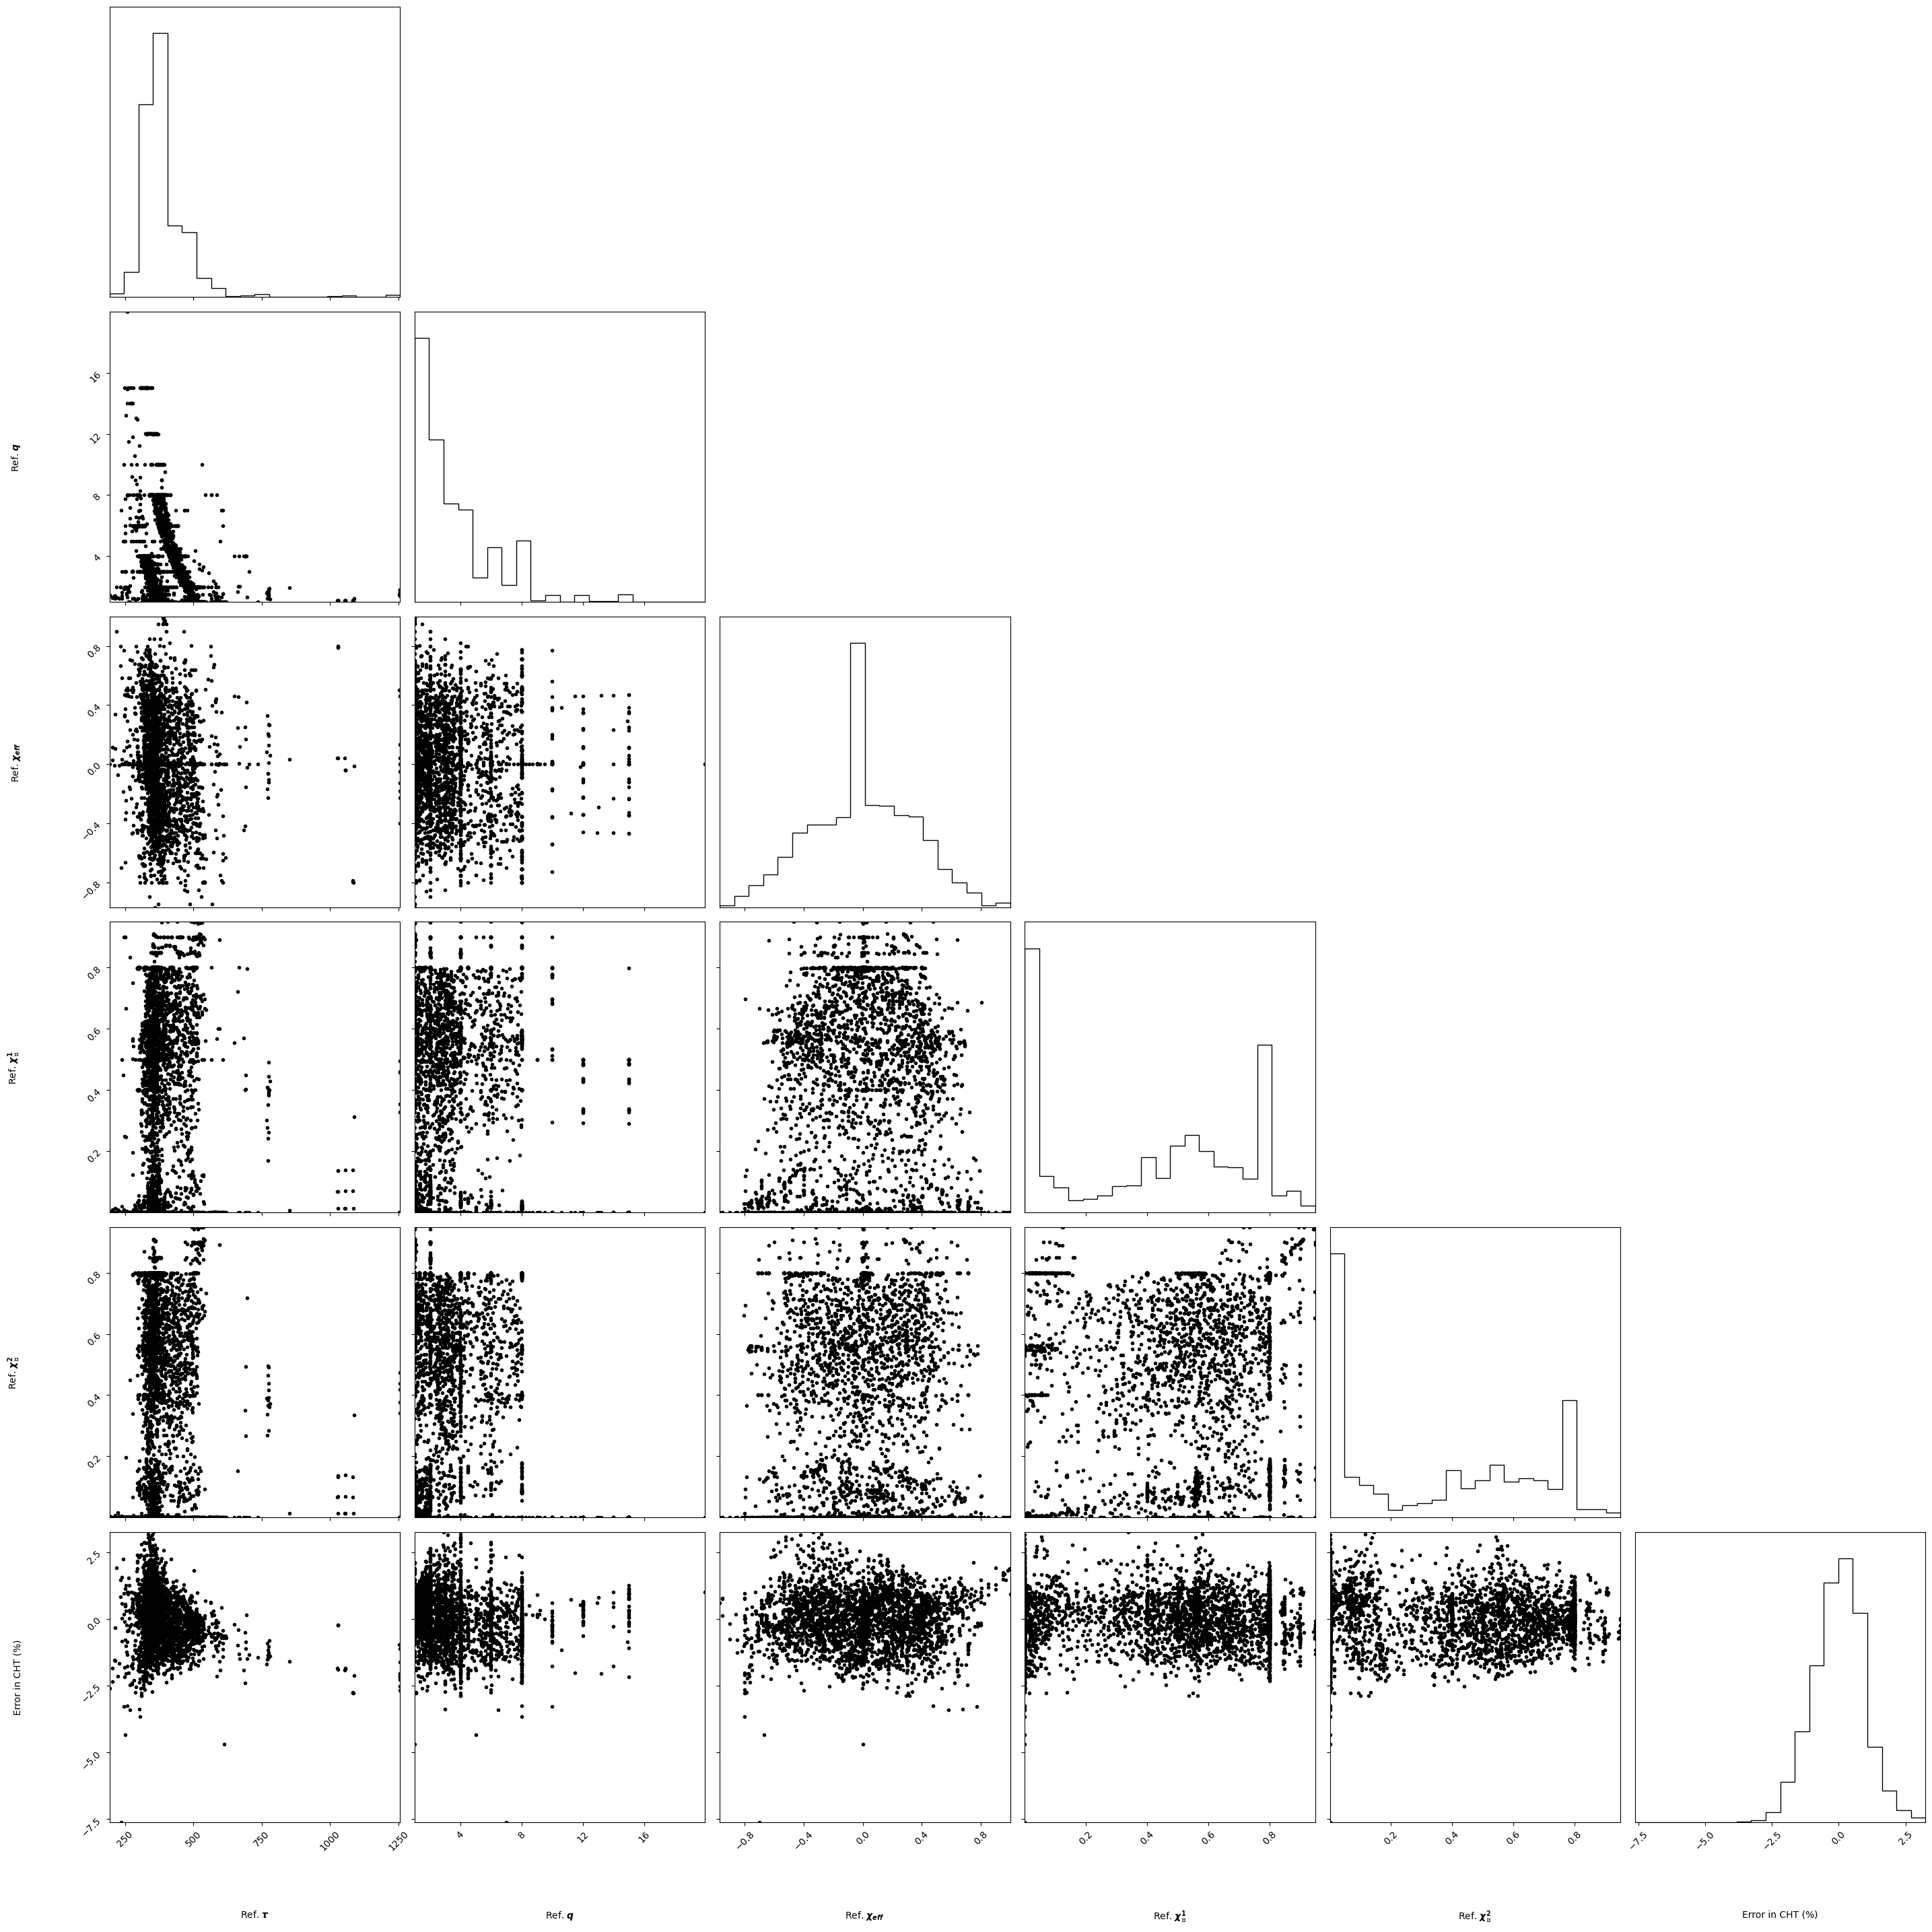

In [114]:

corner_array = np.column_stack([ref_orb_period, df["reference_mass_ratio"], df["reference_chi_eff"], df["reference_chi1_perp"], df["reference_chi2_perp"], per_CHT_residual])
#Here, we've stacked the columns because we want to plot points with data from the same event, but before we just had each value for all the events stored separately

font = {'family': 'sans-serif',
        'weight': 'normal',
        'size'   : 35}
mpl.rcdefaults()
#mpl.rc('font', **font)
mpl.rcParams["mathtext.fontset"] = 'dejavusans'

corner_plot = corner.corner(
    corner_array,
    labels=[
        r"Ref. $\tau$",
        r"Ref. $q$",
        r"Ref. $\chi_{eff}$",
        r"Ref. $\chi^1_{\perp}$",
        r"Ref. $\chi^2_{\perp}$",
        r"Error in CHT (%)"],
    plot_contours = False, 
    plot_datapoints = True,
    plot_density = False,
    marker = ".",
    color = "black"
)
corner.overplot_points(corner_plot, corner_array, color = "black")
fig = plt.gcf()
fig.set_size_inches(30, 30)

plt.savefig("precessing_corner_poster.png")

In [115]:
df = dataframe(non_eccentric = True, non_spinning = False, aligned_spin = False, not_deprecated = True)
print(len(df))

ref_orb_period = 2*np.pi/df["reference_orbital_frequency_mag"]
CHT = df["common_horizon_time"] - df["reference_time"]
CHT = CHT/np.max(CHT)
period_norm = ref_orb_period/np.max(ref_orb_period)
q_norm = df["reference_mass_ratio"]/np.max(df["reference_mass_ratio"])

simulations = np.column_stack((period_norm, q_norm, df["reference_chi_eff"], df["reference_chi1_perp"], df["reference_chi2_perp"]))

3527


In [116]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [117]:
def weighted_E(outputs, labels):
   return (outputs - labels)/labels #For every simulation in a batch, I take the difference between the CHT proportion
    #associated with that simulation and the CHT proportion predicted by my model weighted by the simulation proportion. This should give the proportion
    #residual of my model's CHT predictions, then I sum up over the batch and divide by the size of the batch
    
criterion = weighted_E

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self, activation_function):
        super().__init__()
        self.fc1 = nn.Linear(5, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 1)
        self.activation_function = activation_function
    
    def forward(self, x):
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.activation_function(self.fc3(x))
        x = self.fc4(x)
        return x

In [118]:
net = Net(nn.ReLU())
model_path = 'nnet_33177.pth'

net.load_state_dict(torch.load(model_path, weights_only=False))
net.eval()

CHT = torch.tensor(CHT, dtype=torch.float)
simulations = torch.tensor(simulations, dtype=torch.float)

class CustomDataset():
    def __init__(self, labels, data):
        self.labels = labels
        self.data = data

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        sim = self.data[idx]
        label = self.labels[idx]
        return sim, label

eval_sims = CustomDataset(CHT, simulations)

from torch.utils.data import DataLoader

batch_num = 1
eval_dataloader = DataLoader(eval_sims, batch_size=batch_num, shuffle=False)

eval_losses = np.zeros(len(df))

with torch.no_grad():
    for j, data in enumerate(eval_dataloader):
        inputs, labels = data

        inputs = inputs.float()
        
        outputs = net(inputs)

        outputs = outputs.squeeze()

        outputs = outputs.float()

        labels = labels.float()

        loss = criterion(outputs, labels)
        eval_losses[j] = 100 * loss.item()

/tmp/ipykernel_4483/1671745022.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  CHT = torch.tensor(CHT, dtype=torch.float)


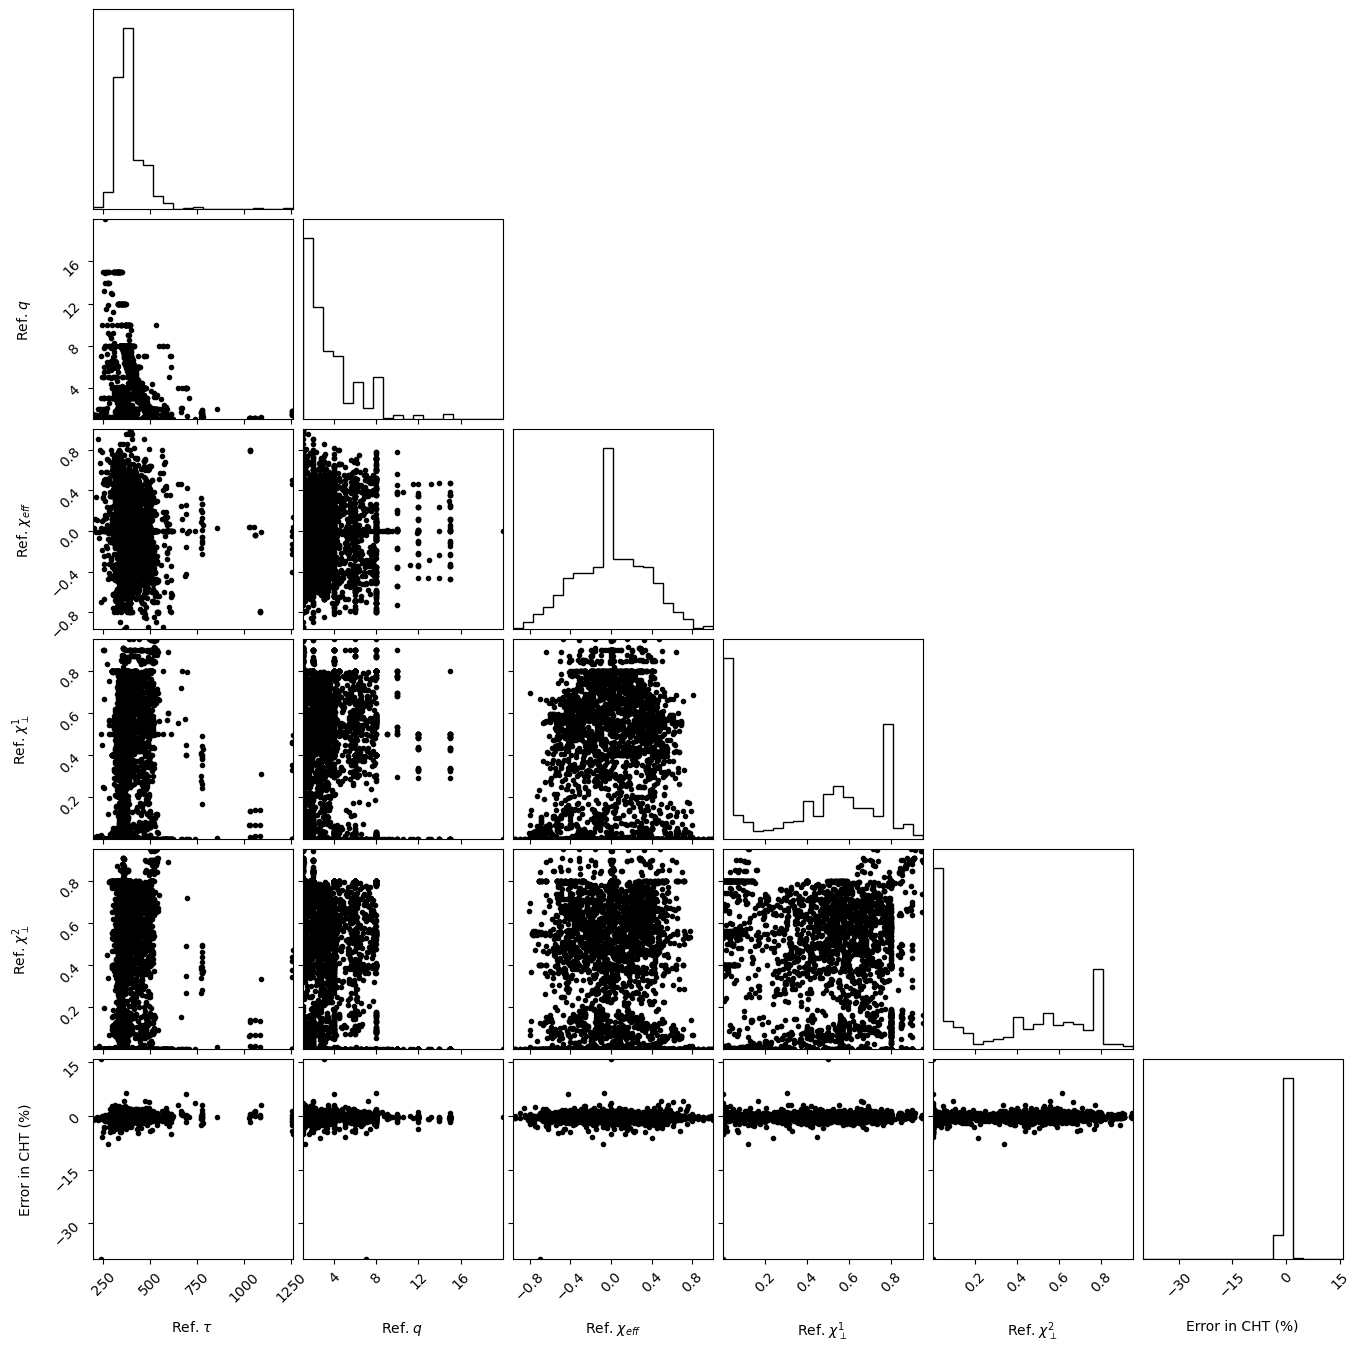

In [58]:

corner_array = np.column_stack([ref_orb_period, df["reference_mass_ratio"], df["reference_chi_eff"], df["reference_chi1_perp"], df["reference_chi2_perp"], eval_losses])

corner_plot = corner.corner(
    corner_array,
    labels=[
        r"Ref. $\tau$",
        r"Ref. $q$",
        r"Ref. $\chi_{eff}$",
        r"Ref. $\chi^1_{\perp}$",
        r"Ref. $\chi^2_{\perp}$",
        r"Error in CHT (%)"],
    plot_contours = False, 
    plot_datapoints = True,
    plot_density = False,
    marker = ".",
    color = "black"
)
corner.overplot_points(corner_plot, corner_array, color = "black")

plt.savefig("nnet_corner_poster.png")

In [31]:
print(np.median(abs(eval_losses)))
print(np.max(abs(eval_losses)))

0.40594814345240593
40.10234177112579
